<a href="https://colab.research.google.com/github/MuhammadHelmyOmar/Authorship-Identification/blob/main/data_discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [30]:
import pandas as pd
from google.colab.drive import mount

In [31]:
mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
train_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Authorship Identification/Data/AuthorshipClassficiationTrain.xlsx')

train_data.head()

,id,text_in_author_style,author
0,5843,"هذه الكتب التي أصدرتُها منذ بدأت كتابة باب ""من...",يوسف إدريس
1,5844,صعب جِدًّا في ظل هذا التقسيم الإرهابي أن أقول ...,يوسف إدريس
2,5845,كان ممكنًا أن أتفادى هذا\n\nالموضوع الشائك، وأ...,يوسف إدريس
3,5846,ومن المُمكن للعراق وحده أن يَجتثَّه ويقضي على ...,يوسف إدريس
4,5847,كنتُ أريد أن أتناول موضوعًا من هذه المواضيع.\n...,يوسف إدريس


In [33]:
print(len(train_data))
print(len(train_data.author.value_counts()))
train_data.author.value_counts()

35122
21


,count
author,
حسن حنفي,3744
أحمد أمين,2897
جُرجي زيدان,2768
روبرت بار,2682
محمد حسين هيكل,2627
طه حسين,2376
عباس محمود العقاد,1829
فؤاد زكريا,1773
نجيب محفوظ,1634


In [34]:
train_data['text_in_author_style'].describe()

,text_in_author_style
count,35122
unique,32784
top,البهلول\n\nيدهشني ما بينك وبين بناتك من صلة؛ ف...
freq,2


In [35]:
train_data['text_in_author_style'].duplicated(keep='first').sum()

np.int64(2338)

In [36]:
train_data.drop_duplicates(['text_in_author_style', 'author'],keep='first', inplace=True, ignore_index=True)

32784

In [38]:
print(len(train_data))
print(len(train_data.author.value_counts()))
train_data.author.value_counts()

32784
21


,count
author,
حسن حنفي,3744
أحمد أمين,2897
جُرجي زيدان,2768
محمد حسين هيكل,2627
طه حسين,2376
عباس محمود العقاد,1829
فؤاد زكريا,1773
نجيب محفوظ,1634
أمين الريحاني,1567


# Visulization

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

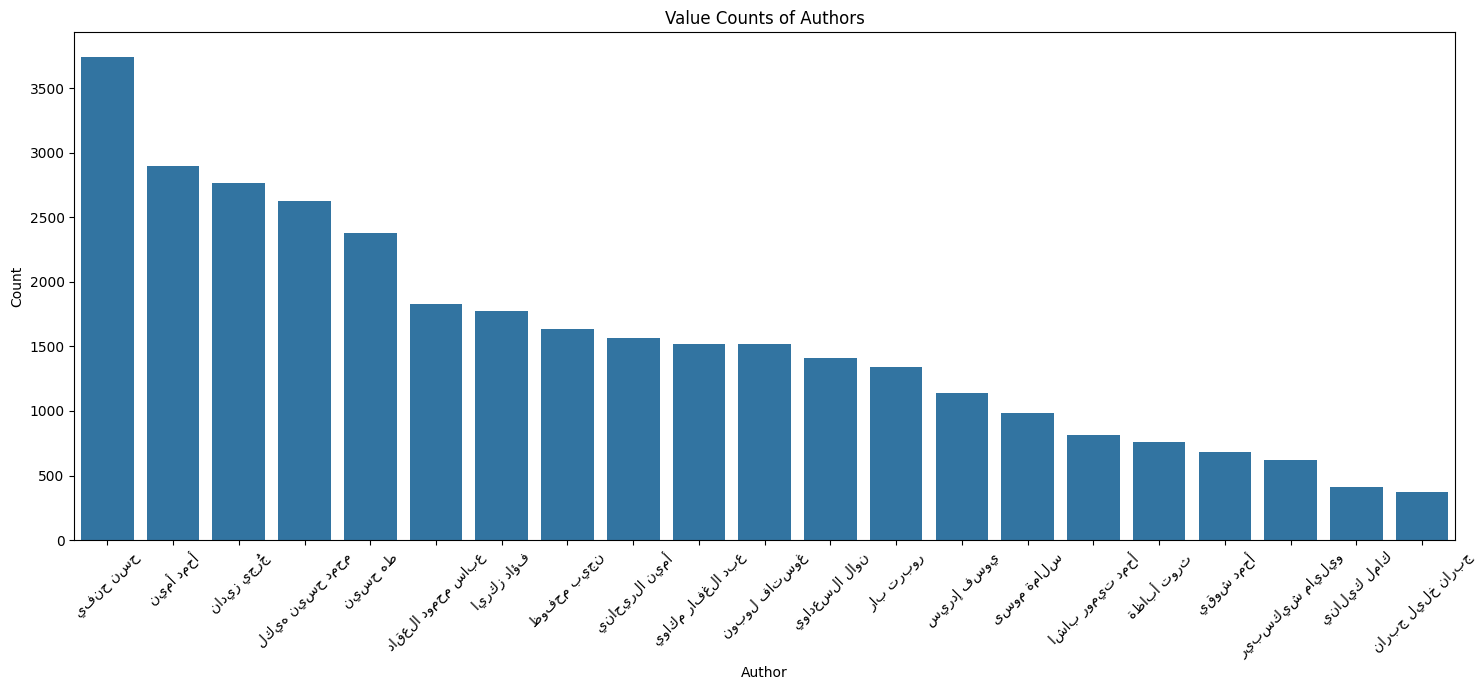

In [39]:
# Get the value counts of the 'author' column
author_counts = train_data['author'].value_counts()
names_rev = [name[-1::-1] for name in author_counts.index]

# Create a bar chart
plt.figure(figsize=(15, 7)) # Increased figure size
sns.barplot(x=names_rev, y=author_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Author')
plt.ylabel('Count')
plt.title('Value Counts of Authors')
plt.tight_layout()
plt.show()